**Importing required packages**

In [1]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment=None
sns.set_style(style="dark")

**Importing the used vehicles dataset to predict their selling price**

In [2]:
car_ds=pd.read_csv('Car details v3.csv')

In [3]:
car_ds

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


**Rows and columns in the dataset**

In [4]:
car_ds.shape

(8128, 13)

**Attributes in the dataset**

In [5]:
car_ds.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

**Datatype and number of non null values in each attribute of the dataset**

In [6]:
car_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


**Statistical description of each numerical attribute in the dataset**

In [7]:
car_ds.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


**Removing the units from the instances and renaming attribute names with their unit**

**Renaming columns**

In [8]:
car_ds.rename(columns={"name":"Name","year":"Year","selling_price":"Selling_price","km_driven":"Km_driven","fuel":"Fuel","seller_type":"Seller_type","transmission":"Transmission","owner":"Owner","mileage":"Mileage(kmpl)","engine":"Engine(CC)","max_power":"Max_power(bhp)","torque":"Torque","seats":"Seats"},inplace=True)

**Removing units from instances**

In [9]:
car_ds['Mileage(kmpl)'].replace(' kmpl', '', inplace=True, regex=True)
car_ds['Mileage(kmpl)'].replace(' km/kg', '', inplace=True, regex=True)
car_ds['Max_power(bhp)'].replace(' bhp', '', inplace=True, regex=True)
car_ds['Engine(CC)'].replace(' CC', '', inplace=True, regex=True)

In [10]:
car_ds

,Name,Year,Selling_price,Km_driven,Fuel,Seller_type,Transmission,Owner,Mileage(kmpl),Engine(CC),Max_power(bhp),Torque,Seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5,1197,82.85,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8,1493,110,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3,1248,73.9,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396,70,140Nm@ 1800-3000rpm,5.0


**Changing the datatype of few attributes after removing the unit from the instances**

In [11]:
car_ds[['Mileage(kmpl)','Engine(CC)','Max_power(bhp)']]=car_ds[['Mileage(kmpl)','Engine(CC)','Max_power(bhp)']].apply(pd.to_numeric)

In [12]:
car_ds['Year']=car_ds['Year'].astype('object')
car_ds['Seats']=car_ds['Seats'].replace([2,4,5,6,7,8,9,10,14],['two','four','five','six','seven','eight','nine','ten','fourteen'])

**Datatype of each attribute in dataset**

In [13]:
car_ds.dtypes

Name               object
Year               object
Selling_price       int64
Km_driven           int64
Fuel               object
Seller_type        object
Transmission       object
Owner              object
Mileage(kmpl)     float64
Engine(CC)        float64
Max_power(bhp)    float64
Torque             object
Seats              object
dtype: object

**Classifying the attributes based on categorical values**

In [14]:
car_cat=car_ds.select_dtypes(include=['object']).copy()
car_cat

,Name,Year,Fuel,Seller_type,Transmission,Owner,Torque,Seats
0,Maruti Swift Dzire VDI,2014,Diesel,Individual,Manual,First Owner,190Nm@ 2000rpm,five
1,Skoda Rapid 1.5 TDI Ambition,2014,Diesel,Individual,Manual,Second Owner,250Nm@ 1500-2500rpm,five
2,Honda City 2017-2020 EXi,2006,Petrol,Individual,Manual,Third Owner,"12.7@ 2,700(kgm@ rpm)",five
3,Hyundai i20 Sportz Diesel,2010,Diesel,Individual,Manual,First Owner,22.4 kgm at 1750-2750rpm,five
4,Maruti Swift VXI BSIII,2007,Petrol,Individual,Manual,First Owner,"11.5@ 4,500(kgm@ rpm)",five
...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,Petrol,Individual,Manual,First Owner,113.7Nm@ 4000rpm,five
8124,Hyundai Verna CRDi SX,2007,Diesel,Individual,Manual,Fourth & Above Owner,"24@ 1,900-2,750(kgm@ rpm)",five
8125,Maruti Swift Dzire ZDi,2009,Diesel,Individual,Manual,First Owner,190Nm@ 2000rpm,five
8126,Tata Indigo CR4,2013,Diesel,Individual,Manual,First Owner,140Nm@ 1800-3000rpm,five


**Classifying the attributes based on numerical values**

In [15]:
car_num=car_ds.select_dtypes(include=['int64','float64']).copy()
car_num

,Selling_price,Km_driven,Mileage(kmpl),Engine(CC),Max_power(bhp)
0,450000,145500,23.40,1248.0,74.00
1,370000,120000,21.14,1498.0,103.52
2,158000,140000,17.70,1497.0,78.00
3,225000,127000,23.00,1396.0,90.00
4,130000,120000,16.10,1298.0,88.20
...,...,...,...,...,...
8123,320000,110000,18.50,1197.0,82.85
8124,135000,119000,16.80,1493.0,110.00
8125,382000,120000,19.30,1248.0,73.90
8126,290000,25000,23.57,1396.0,70.00


# HANDLING DUPLICATE VALUES

**Number of duplicate values in the dataset**

In [16]:
car_ds.duplicated().sum()

1202

**Shape of the dataset before removing duplicate values**

In [17]:
car_ds.shape

(8128, 13)

In [18]:
car_ds.drop_duplicates(inplace=True)

**Shape of the dataset after removing duplicate values**

In [19]:
car_ds.shape

(6926, 13)

# HANDLING MISSING VALUES

**Number of null values in each attribute**

In [20]:
car_ds.isnull().sum()

Name                0
Year                0
Selling_price       0
Km_driven           0
Fuel                0
Seller_type         0
Transmission        0
Owner               0
Mileage(kmpl)     208
Engine(CC)        208
Max_power(bhp)    206
Torque            209
Seats             208
dtype: int64

<AxesSubplot:>

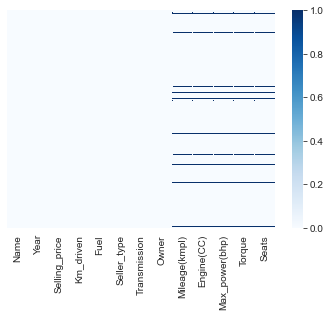

In [21]:
sns.heatmap(car_ds.isnull(),yticklabels=False,cbar=True, cmap="Blues")

**Percentage of null values and non-null values in each attribute of the dataset before handling the missing values**

In [22]:
car_ds.isnull().sum()

Name                0
Year                0
Selling_price       0
Km_driven           0
Fuel                0
Seller_type         0
Transmission        0
Owner               0
Mileage(kmpl)     208
Engine(CC)        208
Max_power(bhp)    206
Torque            209
Seats             208
dtype: int64

**Imputing missing values in Milegae(kmpl) column with mean of mileage**

In [23]:
mileage_mean=car_ds['Mileage(kmpl)'].mean()
mileage_mean

19.465309615957125

In [24]:
car_ds['Mileage(kmpl)'].fillna(mileage_mean,inplace=True)

**Imputing missing values in Engine(CC) column with its mean**

In [25]:
engine_mean=car_ds['Engine(CC)'].mean()
engine_mean

1430.8913367073533

In [26]:
car_ds['Engine(CC)'].fillna(engine_mean,inplace=True)

**Imputing missing values in Max_power(bhp) column with its mean**

In [27]:
Maxpower_mean=car_ds['Max_power(bhp)'].mean()
Maxpower_mean

87.72691889880849

In [28]:
car_ds['Max_power(bhp)'].fillna(Maxpower_mean,inplace=True)

**Removing the attribute Torque from the dataset as it has inconsistent instances**

In [29]:
car_ds.drop('Torque',axis=1,inplace=True)

**Imputing missing values in Seats column with mode**

In [30]:
seat_mode=car_ds['Seats'].mode()[0]
seat_mode

'five'

In [31]:
car_ds['Seats'].fillna(seat_mode,inplace=True)

In [32]:
car_ds.isnull().sum()

Name              0
Year              0
Selling_price     0
Km_driven         0
Fuel              0
Seller_type       0
Transmission      0
Owner             0
Mileage(kmpl)     0
Engine(CC)        0
Max_power(bhp)    0
Seats             0
dtype: int64

# OUTLIER DETECTION

**Detecting outliers in each attribute by visualising with boxplot and using IQR**

In [33]:
def outlier_detection(attribute):
    for i in car_ds.columns:
        if(car_ds[i].dtypes=='float64' or car_ds[i].dtypes=='int64'):
            print("Attribute: ",i)
            print(" ")
            print("Description of the attribute: ",i)
            print(" ")
            print(car_ds[i].describe())
            print(" ")

            Q_1=car_ds[i].quantile(0.25)
            Q_3=car_ds[i].quantile(0.75)
            IQR=Q_3 - Q_1
            print("The Inter Quantile Range is: ",IQR)
            print(" ")
            lower_boundary = Q_1 - 1.5 * IQR
            upper_boundary = Q_3 + 1.5 * IQR
            print("The lower boundary is: ",lower_boundary)
            print(" ")
            print("The upper boundary is: ",upper_boundary)
            print(" ")

            fig=plt.figure(figsize=(8,5))
            sns.boxplot(x=car_ds[i])
            print("Boxplot to detect the outliers: ")
            plt.show()
            print(" ")

            print("If the instances lie between " + str(lower_boundary) + " and " + str(upper_boundary) + " then they are not outliers")
            print(" ")
            print("If the instances lie below " + str(lower_boundary) + " or lie beyond " + str(upper_boundary) + " then they are outliers")
            print(" ")

Attribute:  Selling_price
 
Description of the attribute:  Selling_price
 
count    6.926000e+03
mean     5.172707e+05
std      5.197670e+05
min      2.999900e+04
25%      2.500000e+05
50%      4.000000e+05
75%      6.335000e+05
max      1.000000e+07
Name: Selling_price, dtype: float64
 
The Inter Quantile Range is:  383500.0
 
The lower boundary is:  -325250.0
 
The upper boundary is:  1208750.0
 
Boxplot to detect the outliers: 


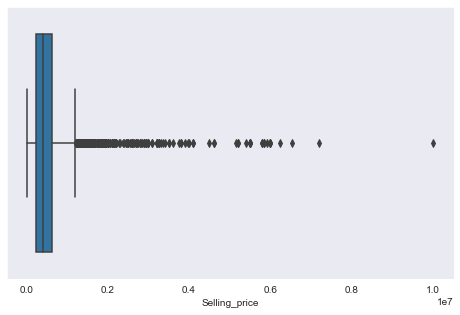

 
If the instances lie between -325250.0 and 1208750.0 then they are not outliers
 
If the instances lie below -325250.0 or lie beyond 1208750.0 then they are outliers
 
Attribute:  Km_driven
 
Description of the attribute:  Km_driven
 
count    6.926000e+03
mean     7.399568e+04
std      5.835810e+04
min      1.000000e+00
25%      4.000000e+04
50%      7.000000e+04
75%      1.000000e+05
max      2.360457e+06
Name: Km_driven, dtype: float64
 
The Inter Quantile Range is:  60000.0
 
The lower boundary is:  -50000.0
 
The upper boundary is:  190000.0
 
Boxplot to detect the outliers: 


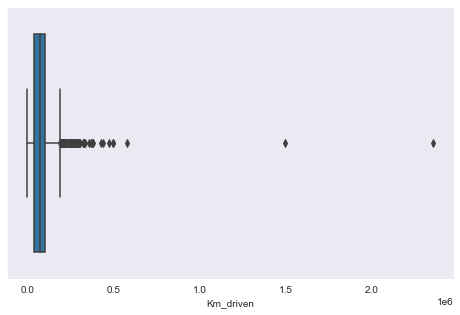

 
If the instances lie between -50000.0 and 190000.0 then they are not outliers
 
If the instances lie below -50000.0 or lie beyond 190000.0 then they are outliers
 
Attribute:  Mileage(kmpl)
 
Description of the attribute:  Mileage(kmpl)
 
count    6926.000000
mean       19.465310
std         3.987876
min         0.000000
25%        16.950000
50%        19.465310
75%        22.320000
max        42.000000
Name: Mileage(kmpl), dtype: float64
 
The Inter Quantile Range is:  5.370000000000001
 
The lower boundary is:  8.894999999999998
 
The upper boundary is:  30.375
 
Boxplot to detect the outliers: 


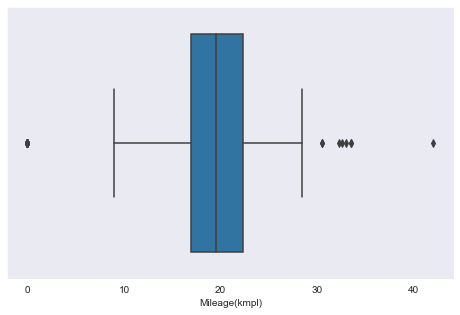

 
If the instances lie between 8.894999999999998 and 30.375 then they are not outliers
 
If the instances lie below 8.894999999999998 or lie beyond 30.375 then they are outliers
 
Attribute:  Engine(CC)
 
Description of the attribute:  Engine(CC)
 
count    6926.000000
mean     1430.891337
std       486.025467
min       624.000000
25%      1197.000000
50%      1248.000000
75%      1498.000000
max      3604.000000
Name: Engine(CC), dtype: float64
 
The Inter Quantile Range is:  301.0
 
The lower boundary is:  745.5
 
The upper boundary is:  1949.5
 
Boxplot to detect the outliers: 


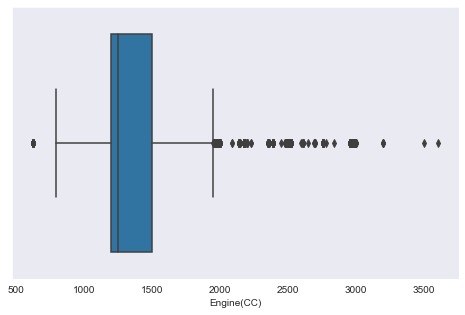

 
If the instances lie between 745.5 and 1949.5 then they are not outliers
 
If the instances lie below 745.5 or lie beyond 1949.5 then they are outliers
 
Attribute:  Max_power(bhp)
 
Description of the attribute:  Max_power(bhp)
 
count    6926.000000
mean       87.726919
std        31.295492
min         0.000000
25%        68.000000
50%        81.860000
75%        99.000000
max       400.000000
Name: Max_power(bhp), dtype: float64
 
The Inter Quantile Range is:  31.0
 
The lower boundary is:  21.5
 
The upper boundary is:  145.5
 
Boxplot to detect the outliers: 


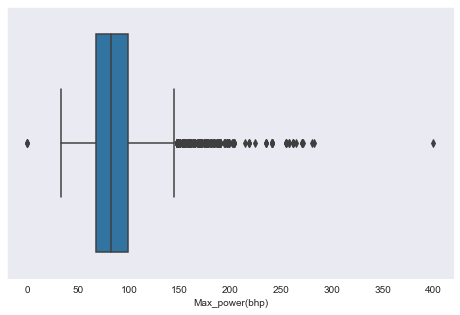

 
If the instances lie between 21.5 and 145.5 then they are not outliers
 
If the instances lie below 21.5 or lie beyond 145.5 then they are outliers
 


In [34]:
outlier_detection(car_ds)

**Outliers in each attribute is treated using 10th and 90th percentile**

In [35]:
def outlier_treatment(attribute):
    for i in car_ds.columns:
        if(car_ds[i].dtypes=='float64' or car_ds[i].dtypes=='int64'):
            tenth_percentile=car_ds[i].quantile(0.10)
            ninetieth_percentile=car_ds[i].quantile(0.90)
            print("Tenth_percentile is :",tenth_percentile)
            print("Ninetieth_percentile is :",ninetieth_percentile)
            print(" ")

            car_ds[i].where(car_ds[i]>tenth_percentile, tenth_percentile, inplace=True)
            car_ds[i].where(car_ds[i]<ninetieth_percentile, ninetieth_percentile, inplace=True)

In [36]:
outlier_treatment(car_ds)

Tenth_percentile is : 145000.0
Ninetieth_percentile is : 900000.0
 
Tenth_percentile is : 20000.0
Ninetieth_percentile is : 120000.0
 
Tenth_percentile is : 14.0
Ninetieth_percentile is : 24.7
 
Tenth_percentile is : 993.0
Ninetieth_percentile is : 2179.0
 
Tenth_percentile is : 57.6
Ninetieth_percentile is : 126.3
 


**Description and Visualization of the attributes after outlier treatment**

In [37]:
def after_treatment(attribute):
    for i in car_ds.columns:
        if(car_ds[i].dtypes=='float64' or car_ds[i].dtypes=='int64'):
            print("Description of the attribute after outlier treatment: ",i)
            print(" ")
            print(car_ds[i].describe())
            print(" ")

            fig=plt.figure(figsize=(8,5))
            sns.boxplot(x=car_ds[i])
            print("Boxplot after outlier treatment: ")
            plt.show()
            print(" ")

Description of the attribute after outlier treatment:  Selling_price
 
count      6926.000000
mean     454552.519636
std      244217.611832
min      145000.000000
25%      250000.000000
50%      400000.000000
75%      633500.000000
max      900000.000000
Name: Selling_price, dtype: float64
 
Boxplot after outlier treatment: 


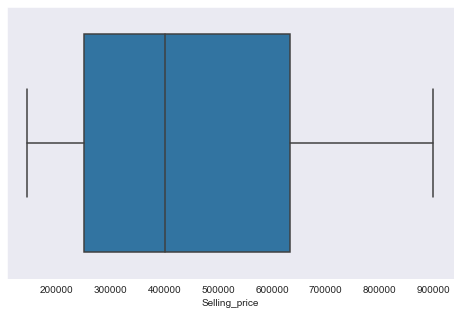

 
Description of the attribute after outlier treatment:  Km_driven
 
count      6926.000000
mean      69057.258302
std       34532.471719
min       20000.000000
25%       40000.000000
50%       70000.000000
75%      100000.000000
max      120000.000000
Name: Km_driven, dtype: float64
 
Boxplot after outlier treatment: 


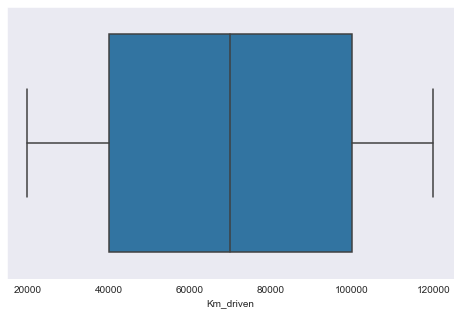

 
Description of the attribute after outlier treatment:  Mileage(kmpl)
 
count    6926.000000
mean       19.463883
std         3.371956
min        14.000000
25%        16.950000
50%        19.465310
75%        22.320000
max        24.700000
Name: Mileage(kmpl), dtype: float64
 
Boxplot after outlier treatment: 


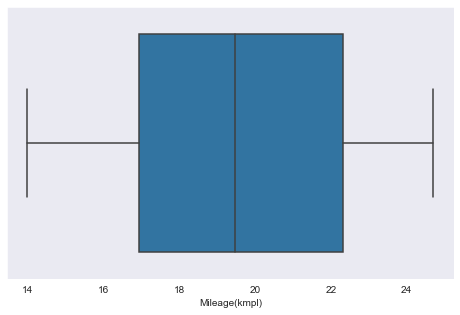

 
Description of the attribute after outlier treatment:  Engine(CC)
 
count    6926.000000
mean     1413.250563
std       379.069375
min       993.000000
25%      1197.000000
50%      1248.000000
75%      1498.000000
max      2179.000000
Name: Engine(CC), dtype: float64
 
Boxplot after outlier treatment: 


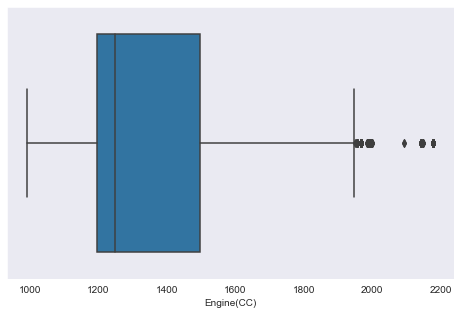

 
Description of the attribute after outlier treatment:  Max_power(bhp)
 
count    6926.000000
mean       85.631686
std        21.381658
min        57.600000
25%        68.000000
50%        81.860000
75%        99.000000
max       126.300000
Name: Max_power(bhp), dtype: float64
 
Boxplot after outlier treatment: 


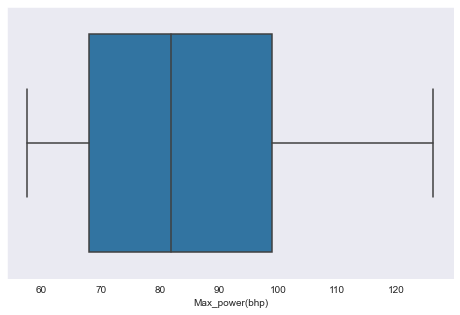

In [38]:
after_treatment(car_ds)

# NORMALIZING NUMERICAL ATTRIBUTES USING NORMALIZATION/MIN MAX SCALING

**Normalization is also known as Minmax scaling. Values of the numerical attributes are rescaled in the range of 0 and 1**

In [39]:
car_norm=car_ds.copy()
car_norm.head()

,Name,Year,Selling_price,Km_driven,Fuel,Seller_type,Transmission,Owner,Mileage(kmpl),Engine(CC),Max_power(bhp),Seats
0,Maruti Swift Dzire VDI,2014,450000,120000,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,five
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,five
2,Honda City 2017-2020 EXi,2006,158000,120000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,five
3,Hyundai i20 Sportz Diesel,2010,225000,120000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,five
4,Maruti Swift VXI BSIII,2007,145000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,five


In [40]:
def minmax_scale(attribute):
    
    x_min = min(attribute,key=lambda x:float(x))
    x_max = max(attribute,key=lambda x:float(x))
    norm=[]
    for i in attribute:
        x_dash=(i-x_min)/(x_max-x_min)
        norm.append(x_dash)
        attribute.replace(i,x_dash,inplace=True)
    print("Some normalized values: ",norm[:10])
    print(" ")
        
    print("Scatterplot of normalized values:")
    
    fig=plt.figure(figsize=(10,10))
    sns.scatterplot(x=norm,y=car_ds.index,color='m',marker='*')

# NORMALIZATION OF SELLING_PRICE

Some normalized values:  [0.40397350993377484, 0.2980132450331126, 0.017218543046357615, 0.10596026490066225, 0.0, 0.39072847682119205, 0.0, 0.0, 0.271523178807947, 0.0728476821192053]
 
Scatterplot of normalized values:


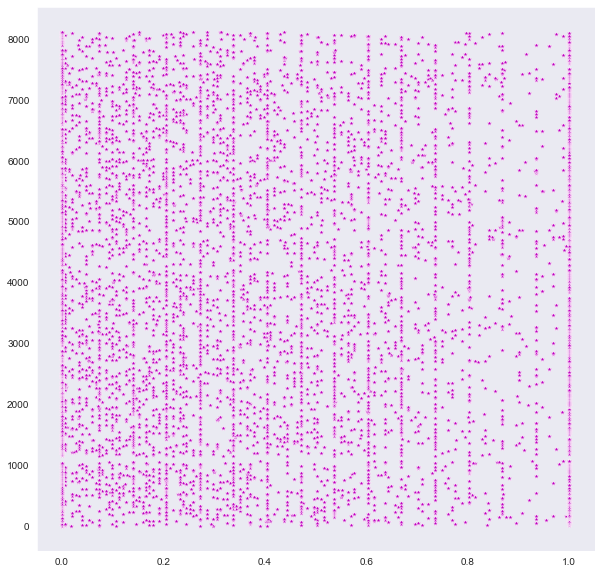

In [41]:
minmax_scale(car_norm['Selling_price'])

# NORMALIZATION OF KM_DRIVEN

Some normalized values:  [1.0, -0.19999, -0.19999, -0.19999, -0.19999, 0.25, -0.19999, 0.0, 0.7, -0.19999]
 
Scatterplot of normalized values:


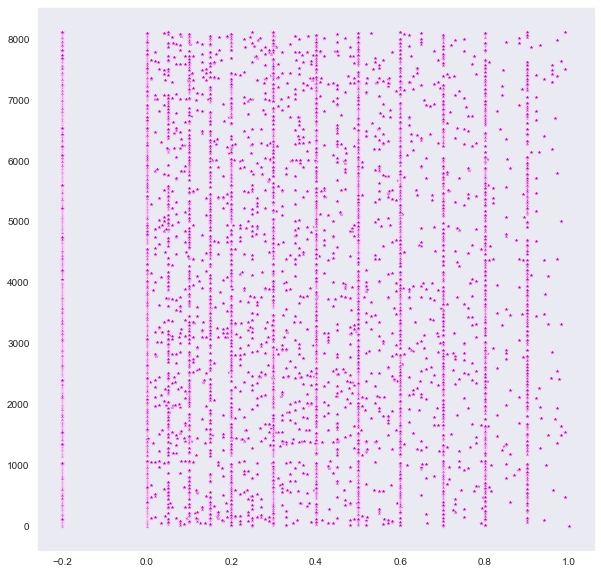

In [42]:
minmax_scale(car_norm['Km_driven'])

# NORMALIZATION OF MILEAGE(KMPL)

Some normalized values:  [0.8785046728971961, 0.6672897196261683, 0.34579439252336447, 0.8411214953271029, 0.1962616822429908, 0.5738317757009347, 0.3084112149532711, -1.2900690016595338, 0.8962616822429907, 0.5607476635514019]
 
Scatterplot of normalized values:


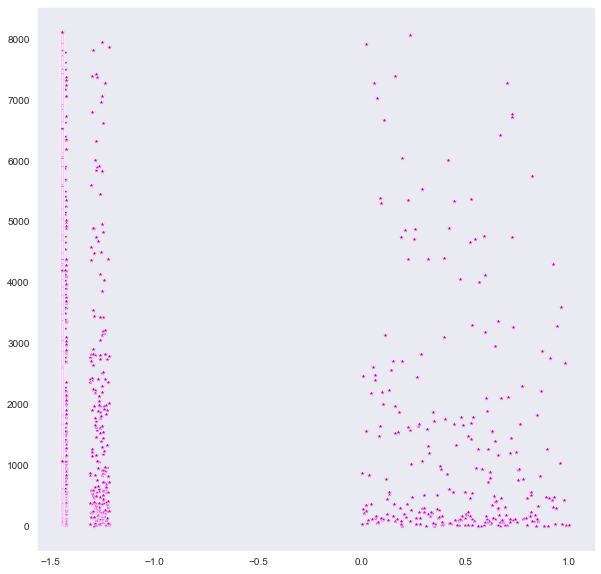

In [43]:
minmax_scale(car_norm['Mileage(kmpl)'])

# NORMALIZATION OF ENGINE(CC)

Some normalized values:  [0.21500843170320405, 0.4258010118043845, 0.42495784148397975, 0.33979763912310285, 0.2571669477234401, 0.17200674536256325, 0.05733558178752108, 0.0, 0.3128161888701518, 0.342327150084317]
 
Scatterplot of normalized values:


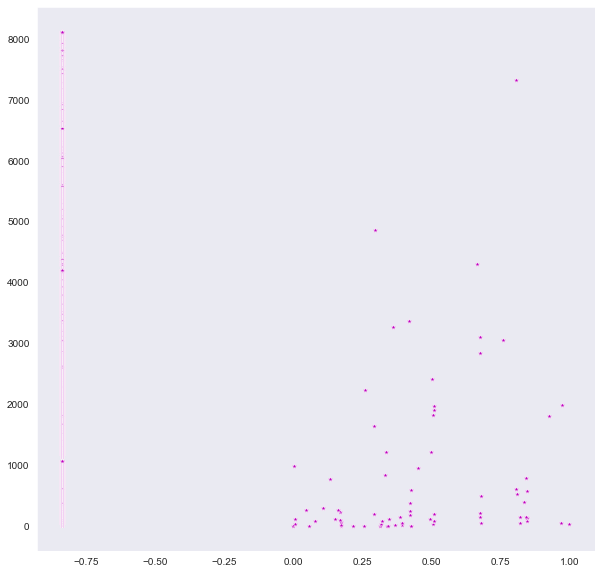

In [44]:
minmax_scale(car_norm['Engine(CC)'])

# NORMALIZATION OF MAX_POWER(BHP)

Some normalized values:  [0.23871906841339158, 0.6684133915574964, 0.29694323144104806, 0.4716157205240175, 0.44541484716157215, 0.35312954876273656, 0.0, -0.8384279475982535, 0.13828238719068406, 0.15283842794759817]
 
Scatterplot of normalized values:


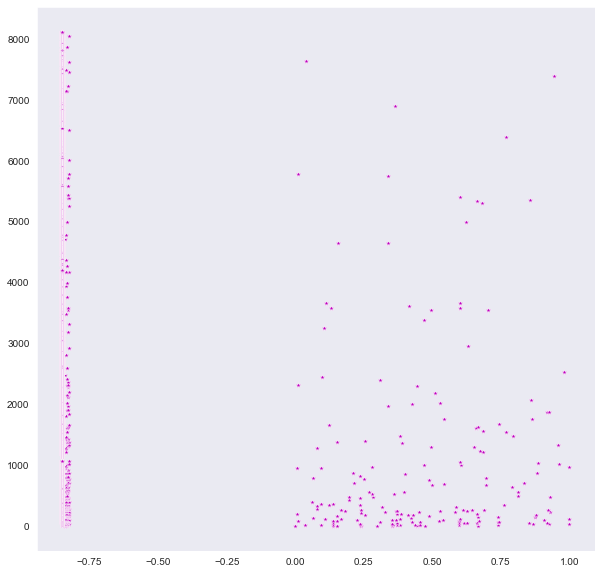

In [45]:
minmax_scale(car_norm['Max_power(bhp)'])

# VARIATE ANALYSIS

# UNIVARIATE ANALYSIS

# UNIVARIATE KDE PLOT

**To analyse the probability density of the vehicle's mileage in kmpl**

<AxesSubplot:xlabel='Mileage(kmpl)', ylabel='Density'>

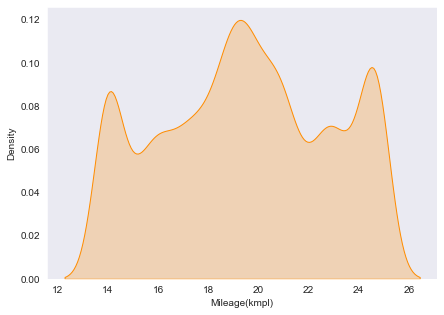

In [46]:
fig=plt.figure(figsize=(7,5))
sns.kdeplot(car_ds['Mileage(kmpl)'],shade=True,color='darkorange')

# INFERENCE:

**The above Kdeplot shows that the probability distribution is higher in the range of 18kmpl to 20 kmpl mileage. So many used vehicles have the mileage in this range.**

# UNIVARIATE HISTPLOT

**To analyse the vehicle's engine capacity**

Text(0.5, 1.0, 'Number of observations of vehicles engine capacity')

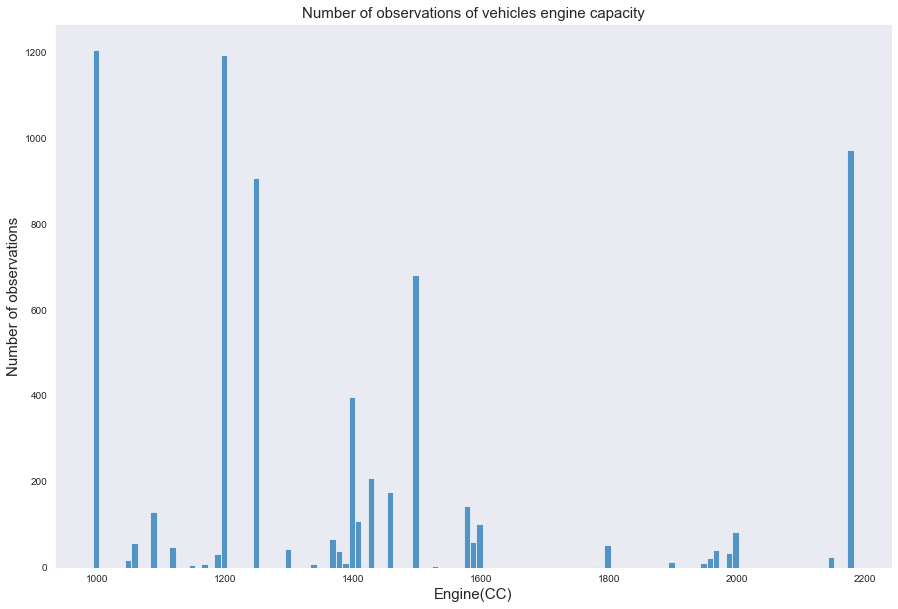

In [47]:
fig=plt.figure(figsize=(15,10))
plot=sns.histplot(car_ds['Engine(CC)'],binwidth=10)
plot.set_xlabel('Engine(CC)',fontsize=15)
plot.set_ylabel('Number of observations',fontsize=15)
plot.set_title('Number of observations of vehicles engine capacity',fontsize=15)

# INFERENCE:

**The above histogram shows that most of the used vehicles have an engine CC of 1000 and least number of vehicles have an engine CC of around 1500** 

# UNIVARIATE PIECHART

**To analyse the percentage of different kinds of owners**

In [48]:
owner=car_ds['Owner'].value_counts()
owner

First Owner             4242
Second Owner            1974
Third Owner              536
Fourth & Above Owner     169
Test Drive Car             5
Name: Owner, dtype: int64

<AxesSubplot:ylabel='Owner'>

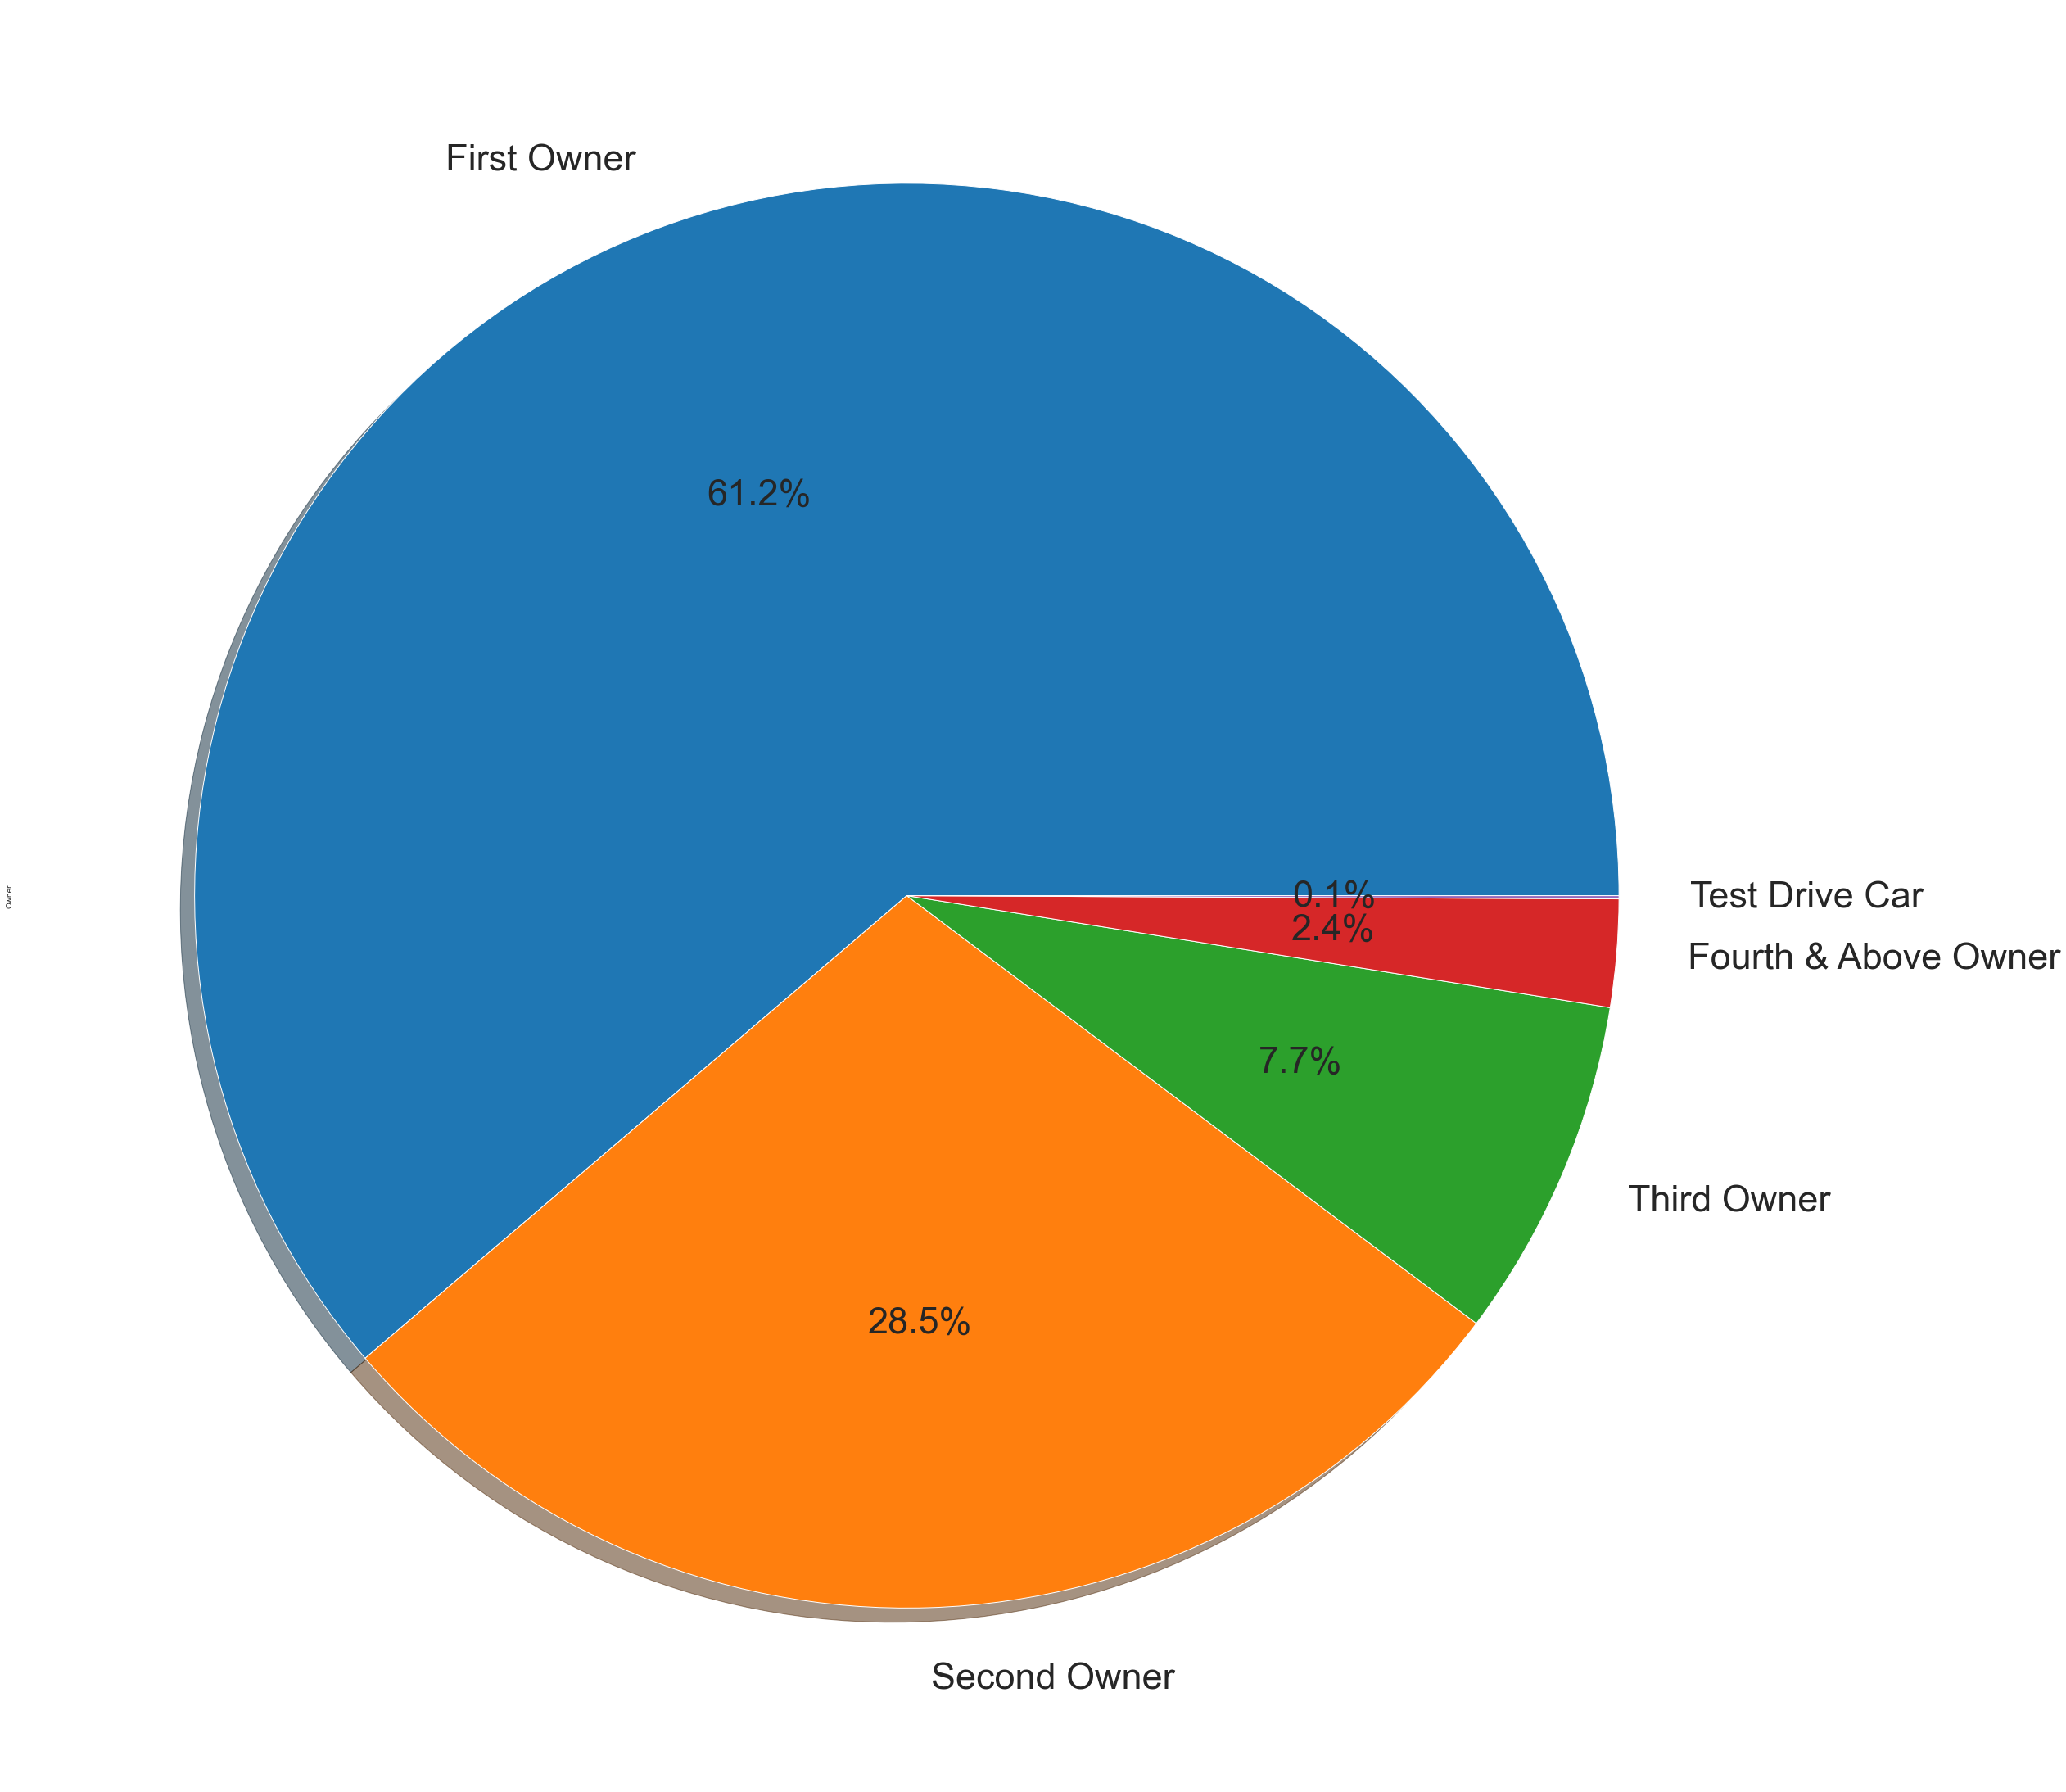

In [49]:
plt.piecolor=sns.color_palette('pastel')[0:5]
label=list(owner.index)
owner.plot.pie(autopct='%1.1f%%',labels=label,figsize=(50,40),fontsize=45,shadow=True)

# INFERENCE:

**Most of the used vehicles belong to their first owner and least number of vehicles are used as test drive car**

# UNIVARIATE BAR PLOT

**To analyse the number of vehicles that have four seats**

<AxesSubplot:>

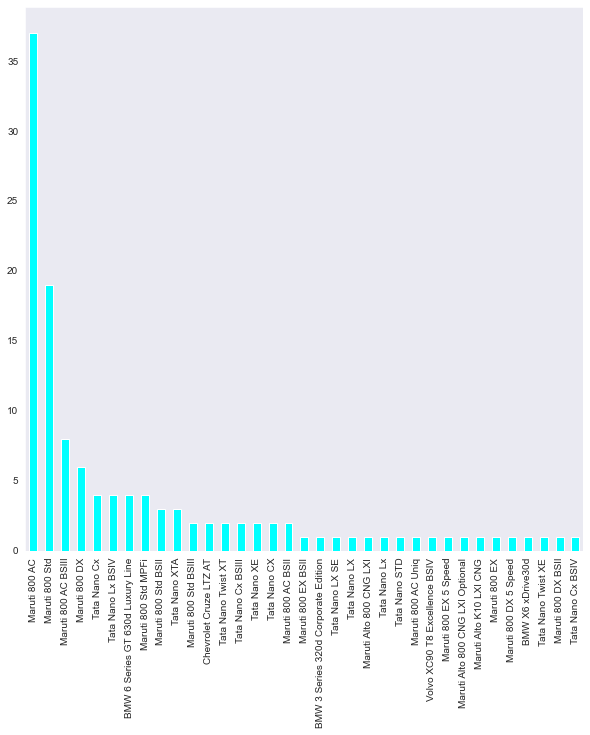

In [50]:
val=car_ds.loc[car_ds['Seats']=='four']
val_cat=val['Name'].value_counts()
fig=plt.figure(figsize=(10,10))
val_cat.plot.bar(color='cyan')

# INFERENCE:

**The above barplot shows that most number of Maruti 800 AC vehicles have 4 seats**

# UNIVARIATE COUNTPLOT

**To analyse the number of vehicles that were bought in each year**

In [51]:
car_ds['Year'].value_counts()

2017    808
2016    693
2015    681
2018    608
2012    604
2014    581
2013    562
2011    554
2010    380
2019    347
2009    240
2008    205
2007    176
2006    123
2005     91
2020     63
2004     60
2003     47
2002     26
2000     20
1999     17
1997     11
1998     10
2001      9
1996      3
1994      3
1995      2
1991      1
1983      1
Name: Year, dtype: int64

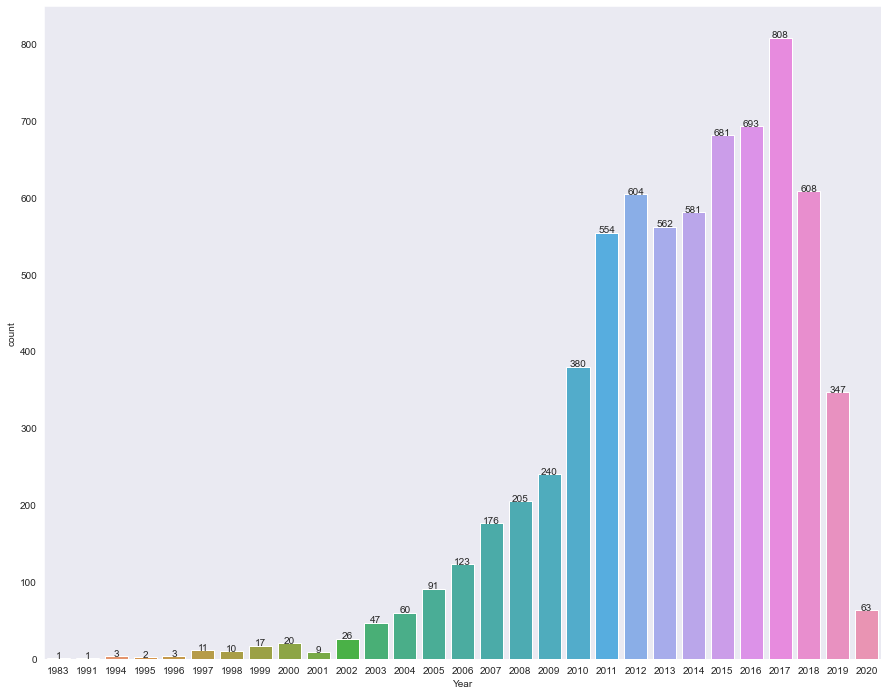

In [52]:
fig, ax=plt.subplots(figsize=(15,12))
cplot=sns.countplot(ax=ax,x=car_ds['Year'])
for i in cplot.patches:
    h=i.get_height()
    cplot.text(i.get_x()+i.get_width()/2.,h+0.1,h,ha="center")

# INFERENCE:

**The above counplot shows that most vehicles were bought in the year 2017 and least number of vehicles were bought during 1983 and 1991**

# UNIVARIATE BOXPLOT

**To analyse the minimum and maximum max power of each vehicles in the normalised dataset**

In [53]:
car_ds['Max_power(bhp)'].describe()

count    6926.000000
mean       85.631686
std        21.381658
min        57.600000
25%        68.000000
50%        81.860000
75%        99.000000
max       126.300000
Name: Max_power(bhp), dtype: float64

<AxesSubplot:xlabel='Max_power(bhp)'>

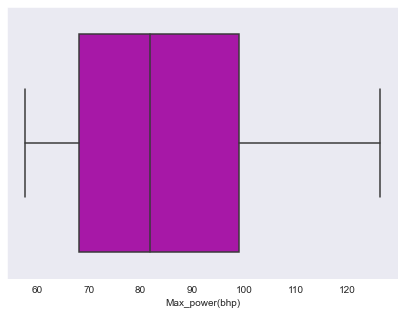

In [54]:
fig=plt.figure(figsize=(7,5))
sns.boxplot(x=car_ds['Max_power(bhp)'],color='m')

**The above boxplot shows that the minimum max power lies below 60bhp and maximum max power lies above 120bhp**

# UNIVARIATE ANALYSIS OF NUMERICAL AND CATEGORICAL VARIABLES

**To analyze the number of vehicles that belong to each category in the categorical attributes and to analyze the distribution of each value in the numerical attributes**

<AxesSubplot:xlabel='Max_power(bhp)', ylabel='Count'>

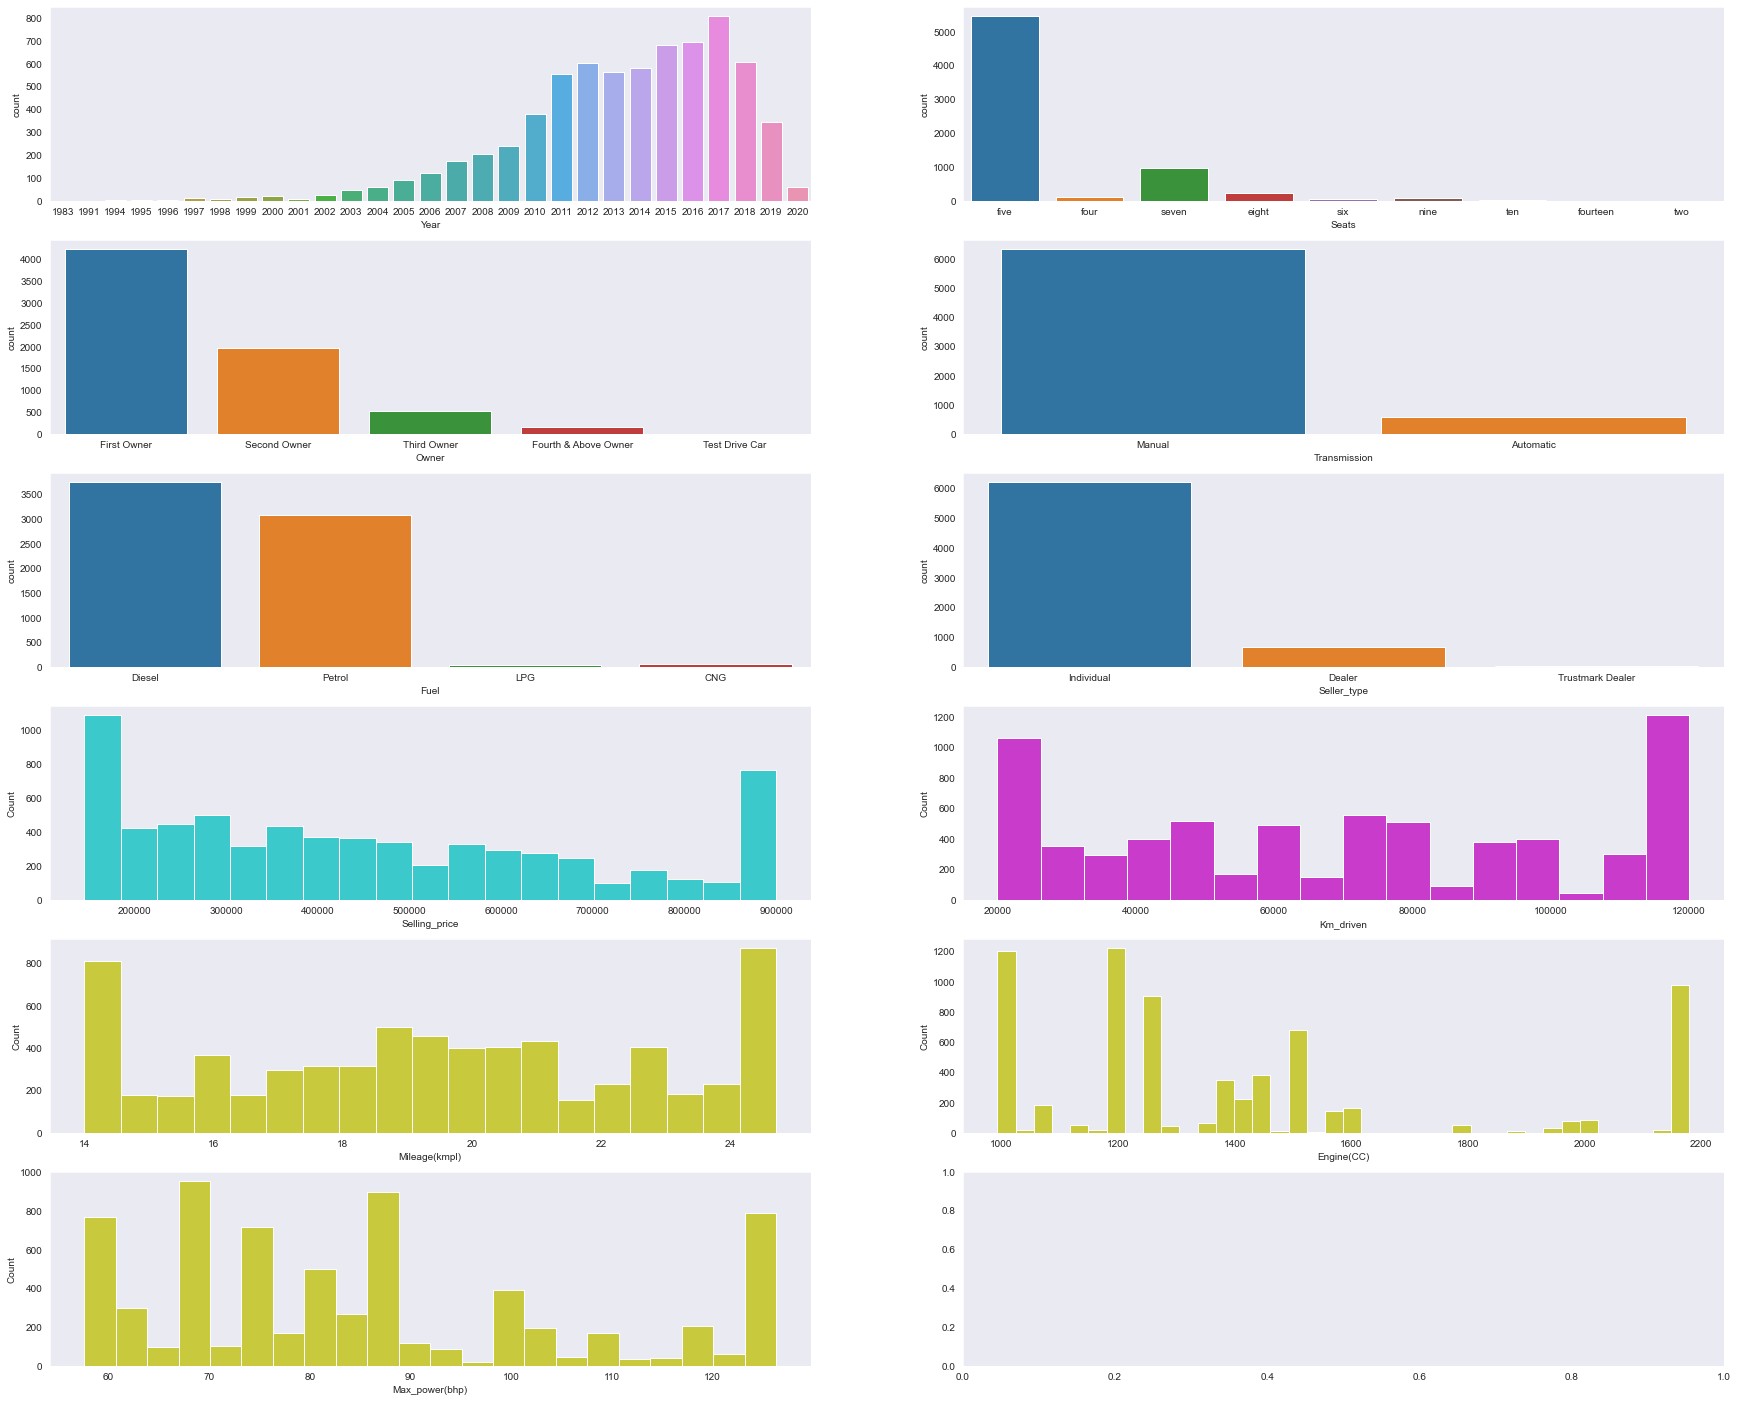

In [55]:
fig,ax = plt.subplots(6,2,figsize=(30,25))
sns.countplot(x=car_ds['Year'],ax=ax[0,0])
sns.countplot(x=car_ds['Seats'],ax=ax[0,1])
sns.countplot(x=car_ds['Owner'],ax=ax[1,0])
sns.countplot(x=car_ds['Transmission'],ax=ax[1,1])
sns.countplot(x=car_ds['Fuel'],ax=ax[2,0])
sns.countplot(x=car_ds['Seller_type'],ax=ax[2,1])
sns.histplot(x=car_ds['Selling_price'],ax=ax[3,0],color='c')
sns.histplot(x=car_ds['Km_driven'],ax=ax[3,1],color='m')
sns.histplot(x=car_ds['Mileage(kmpl)'],ax=ax[4,0],color='y')
sns.histplot(x=car_ds['Engine(CC)'],ax=ax[4,1],color='y')
sns.histplot(x=car_ds['Max_power(bhp)'],ax=ax[5,0],color='y')

# INFERENCE:

# BIVARIATE ANALYSIS

# LINE PLOT USING REGPLOT

**To analyse the relationship between fuel and engine capacity**

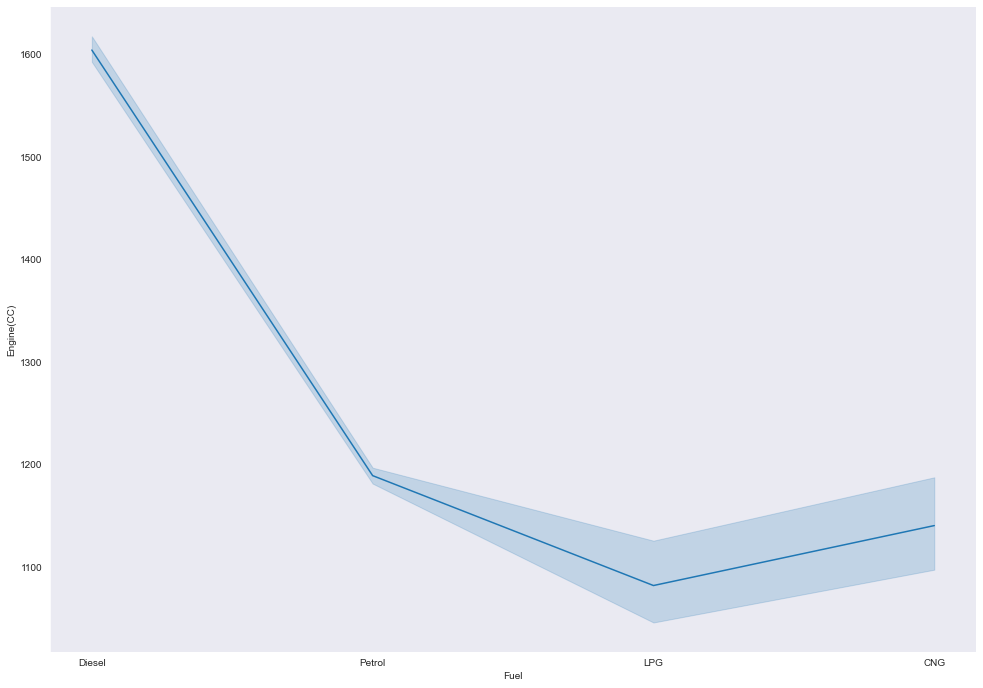

In [56]:
sns.relplot(x=car_ds['Fuel'],y=car_ds['Engine(CC)'],kind='line',markers=True)
plt.gcf().set_size_inches(15,10)

# INFERENCE:

**The above line plot shows that vehicles that use diesel have more engine capacity and LPG vehicles have least engine capacity**

# DISPLOT

**Displot plots histogram by default. It also has other kinds like kdeplot, rugplot, jointplot.**

# HISTOGRAM USING DISPLOT

**To analyse how many vehciles were bought during each year with respect to their owner type**

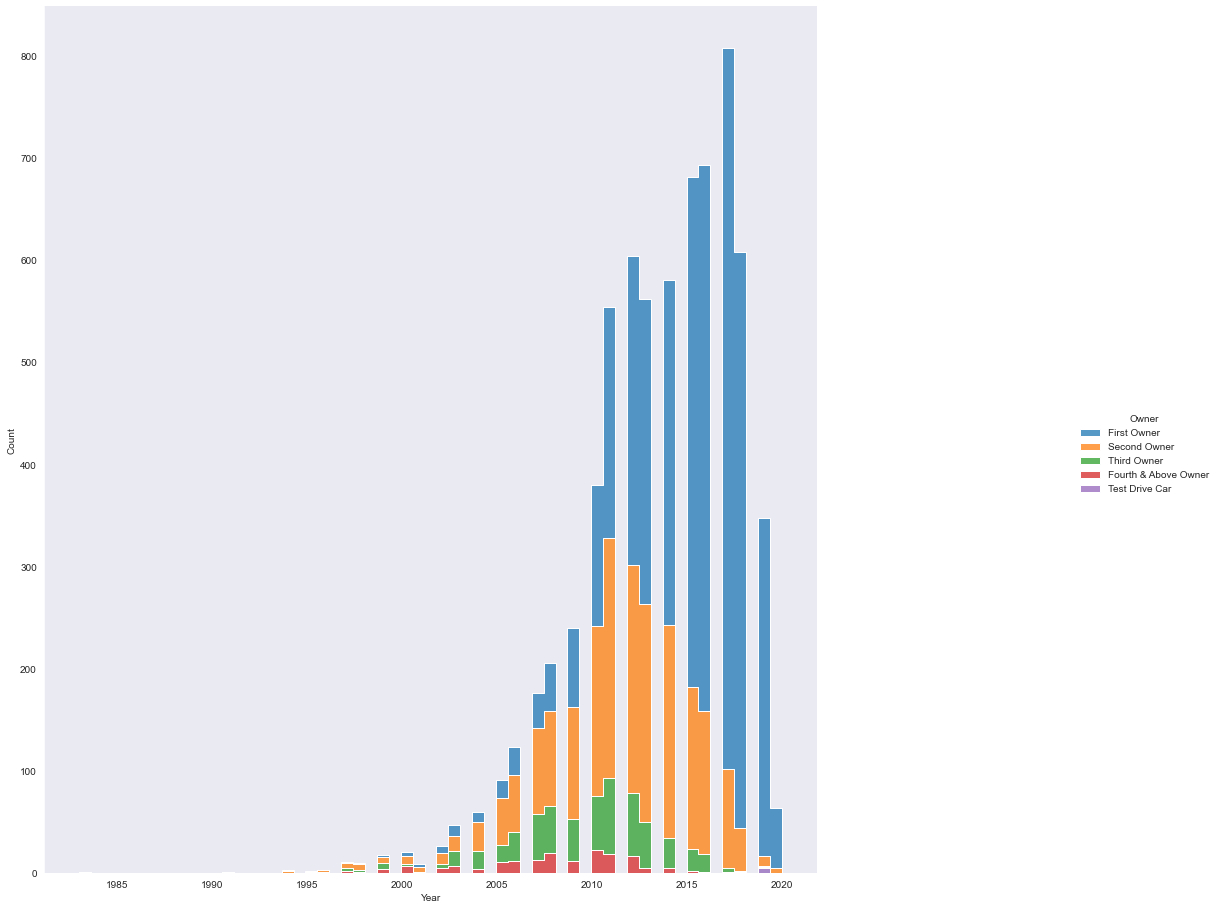

In [57]:
sns.displot(car_ds,x='Year',hue='Owner',element='step',multiple='stack')
plt.gcf().set_size_inches(18,14)

# INFERENCE:

**The above histogram shows that in the year 2017 more vehicles were bought and these vehicles belong to first owner.**

# KDEPLOT USING DISPLOT

**To analyse the relationship of km driven with respect to the type of fuel they use**

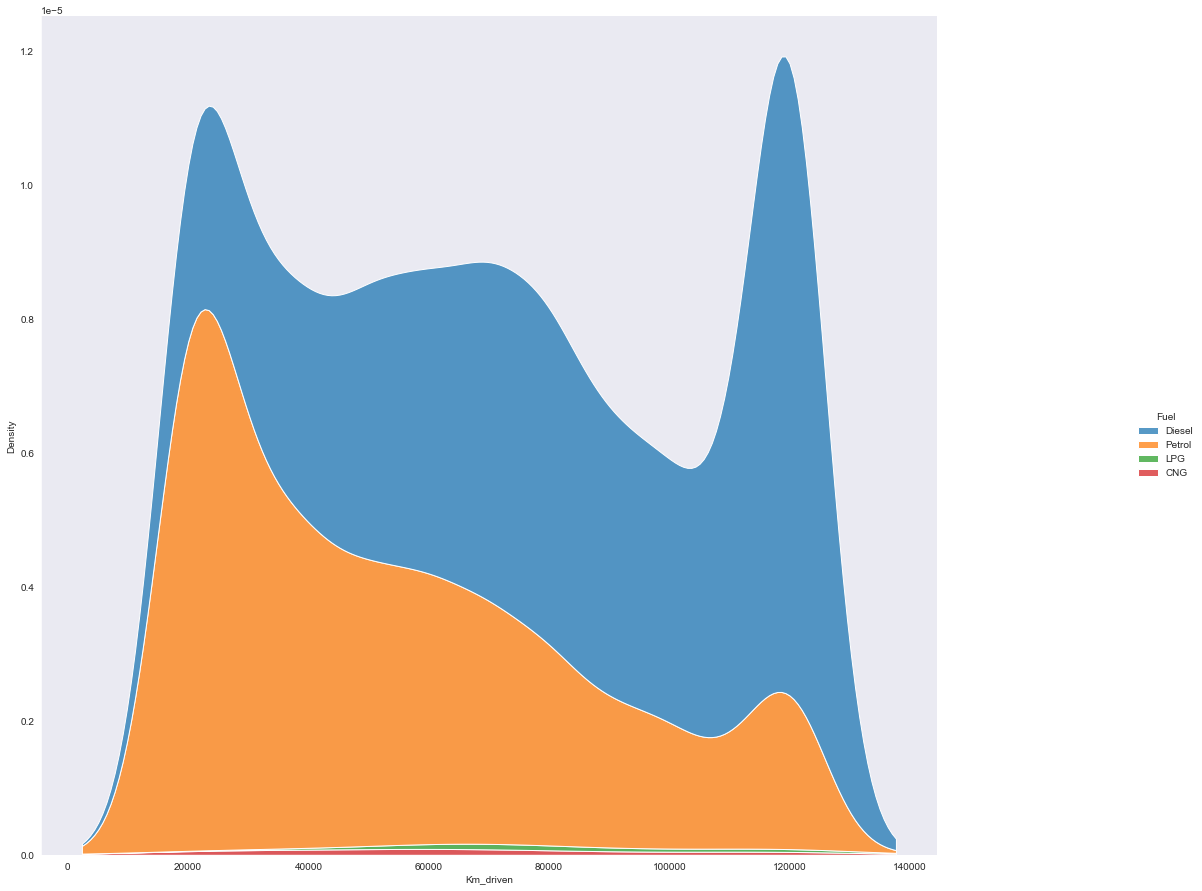

In [58]:
sns.displot(car_ds,x='Km_driven',hue='Fuel',kind='kde',multiple='stack')
plt.gcf().set_size_inches(18,14)

# INFERENCE:

**The above kdeplot shows that vehicles that use diesel have driven more kilometer while vehicles that run using CNG have driven the least kilometers.**

# JOINTPLOT

**To analyse the relationship between mileage and engine capacity of used vehicle**

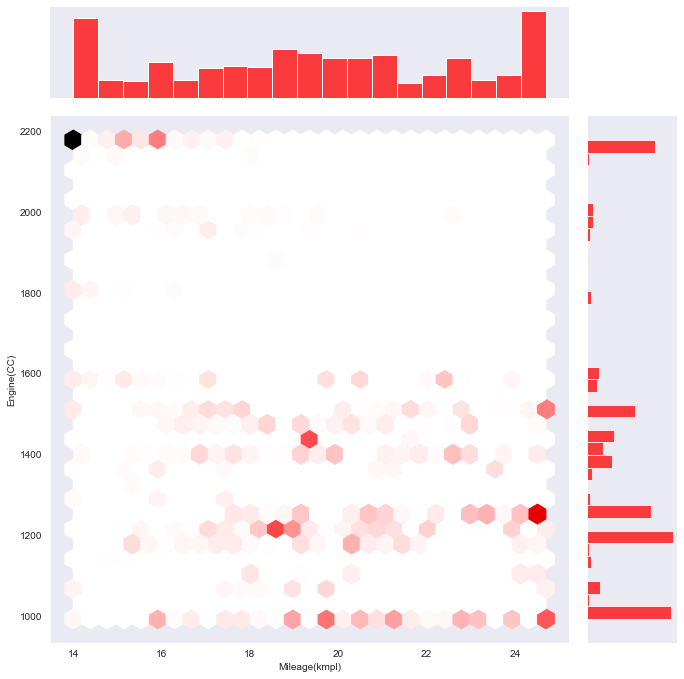

In [59]:
sns.jointplot(x=car_ds['Mileage(kmpl)'],y=car_ds['Engine(CC)'],color='r',kind='hex')
plt.gcf().set_size_inches(10,10)

# INFERENCE:

**The above jointplot shows that many vehicles with a mileage of 14kmpl has an engine capacity of around 2200CC.**

# COUNTPLOT

**To analyse the number of vehicles that have different transmission and fuel type with their mileage being less than 14.5kmpl**

In [60]:
mile=car_ds.loc[car_ds['Mileage(kmpl)']<14.5]

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


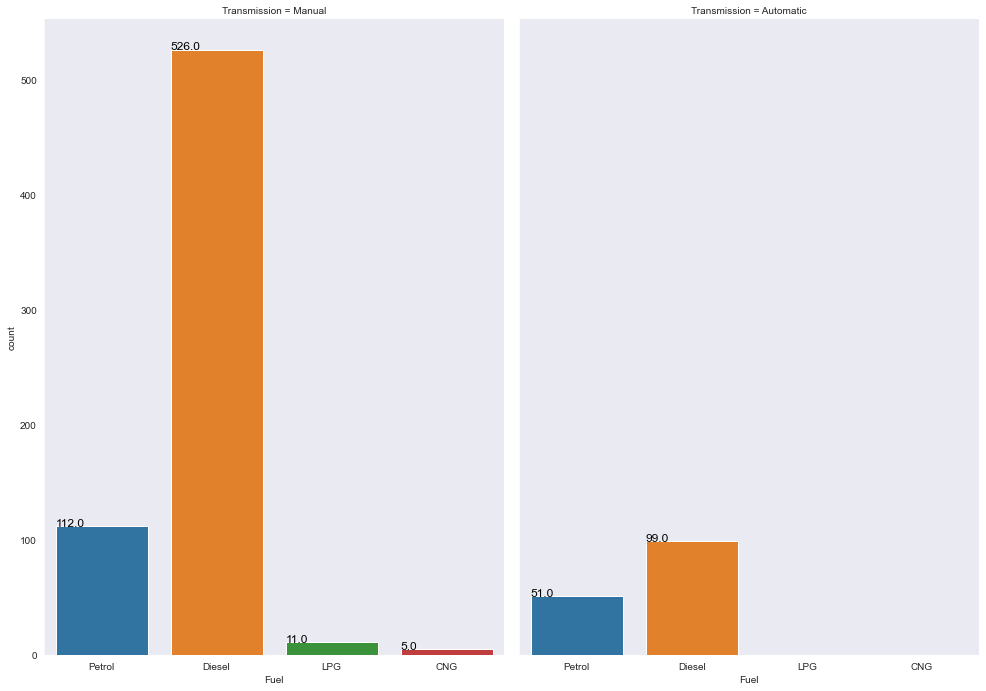

In [61]:
x=sns.catplot(x='Fuel',col='Transmission',kind='count',data=mile)
x.fig.set_size_inches(16,12)
x.fig.subplots_adjust(top=0.81,right=0.86)

ax=x.facet_axis(0,0)
for i in ax.patches:
    ax.text(i.get_x(),i.get_height()*1.0,'{0:.1f}'.format(i.get_height()),color='k',size='large')
    
ax=x.facet_axis(0,1)
for i in ax.patches:
    ax.text(i.get_x(),i.get_height()*1.0,'{0:.1f}'.format(i.get_height()),color='k',size='large')
    

# INFERENCE:

**The above countplot shows that most vehicles that use diesel and are manual have mileage less than 14.5kmpl while least vehicles that use CNG and are manual have mileage less than 14.5kmpl**

# BIVARIATE BARPLOT

**To analyse the relationship between fuel type and number of kilometers driven**

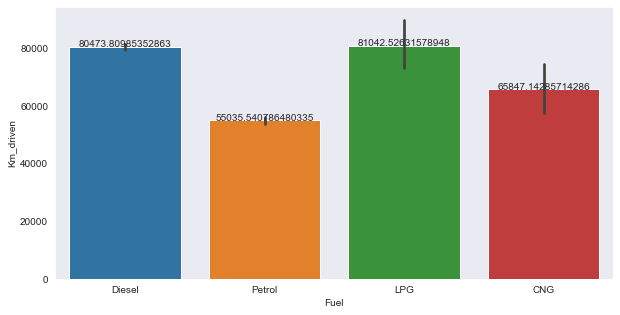

In [62]:
fig,ax = plt.subplots(1,1, figsize=(10,5))
x=sns.barplot(x=car_ds['Fuel'],y=car_ds['Km_driven'])
for i in x.patches:
    height = i.get_height()
    x.text(i.get_x()+i.get_width()/2., height + 1,height ,ha="center")  

# INFERENCE:

**The above barplot shows that vehicles that use LPG have driven more kilometers when compared to vehicles that use petrol, diesel and CNG**

# BIVARIATE KDE PLOT

**To analyse the relationship between selling price and seats in the vehicle**

/Users/smrithi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


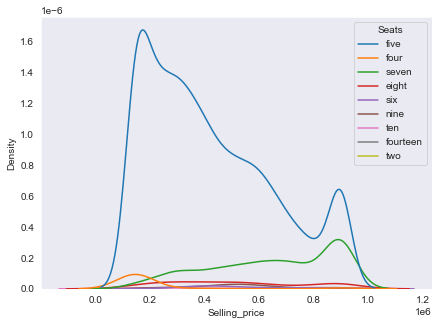

In [63]:
sns.kdeplot(data=car_ds,x='Selling_price',hue='Seats')
plt.gcf().set_size_inches(7,5)

# INFERENCE:

**The above kde plot shows that the selling price of five seater vehicles is more the others**

# MUTLIVARIATE ANALYSIS

# MULTIVARIATE BARPLOT

**To analyse the number of vehicles that belong to a particular seller type and engine capacity with respect to the fuel type**

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


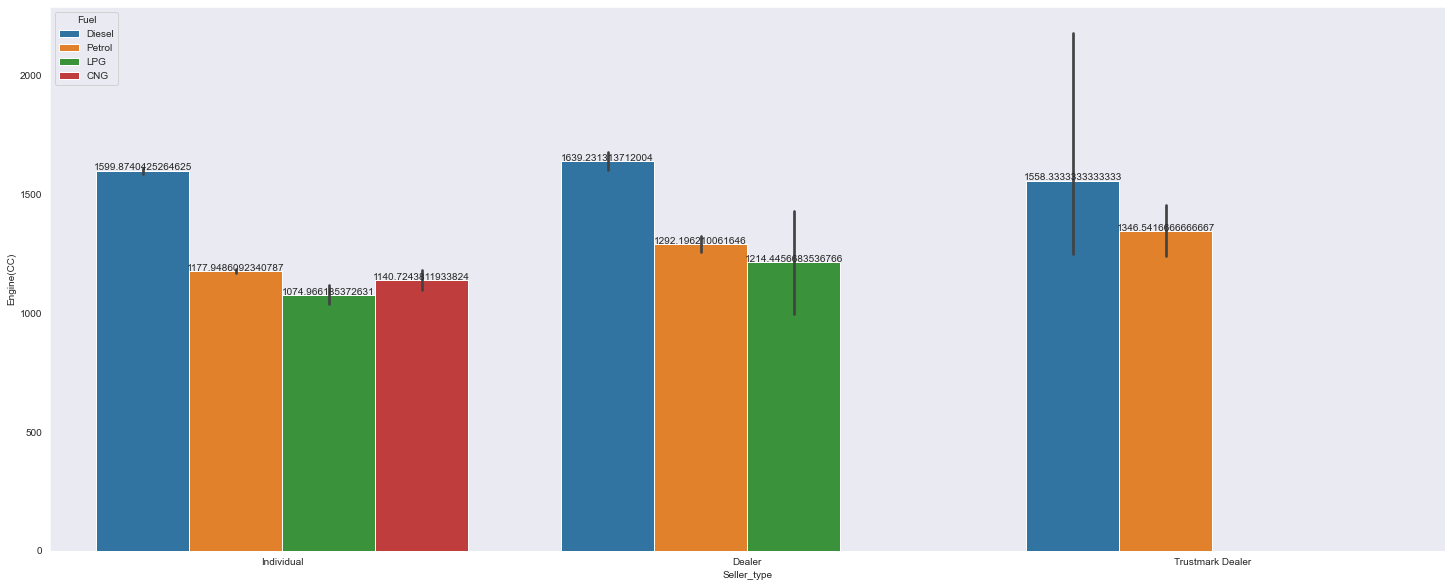

In [64]:
fig,ax = plt.subplots(1,1, figsize=(25,10))
x=sns.barplot(car_ds['Seller_type'],car_ds['Engine(CC)'],hue=car_ds['Fuel'])
for i in x.patches:
    height = i.get_height()
    x.text(i.get_x()+i.get_width()/2., height + 1,height ,ha="center") 

# INFERENCE:

**The above barplot shows that vehicles that run using diesel and have an individual seller type have more engine capacity than the others**

# MULTIVARIATE BOXPLOT

**To analyse the relationship between owner and the number of kilometers driven by them with respect to their seller type**

<AxesSubplot:xlabel='Owner', ylabel='Km_driven'>

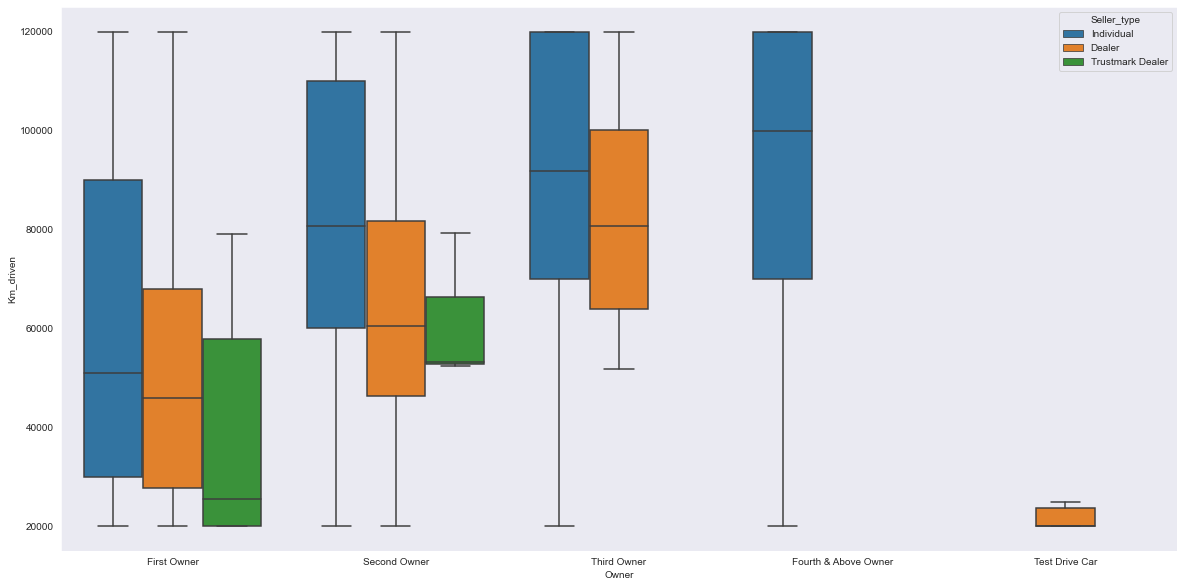

In [65]:
fig=plt.figure(figsize=(20,10))
sns.boxplot(x='Owner',y='Km_driven',hue='Seller_type',data=car_ds)

# INFERENCE:

**The above boxplot shows that the vehicle belonging to fourth and above owner has driven more kilometer and it belongs to an individual seller type**

# MULTIVARIATE CATPLOT

**To analyse the number of vehicles that belong to different owner type and transmission with respect to their seats**

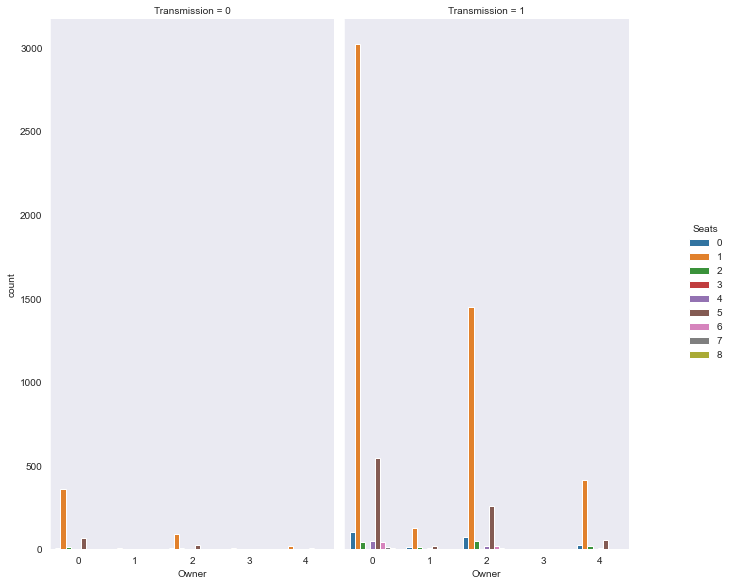

In [119]:
x=sns.catplot(x='Owner',col='Transmission',hue='Seats',kind='count',data=car_ds)
x.fig.set_size_inches(10,10)
x.fig.subplots_adjust(top=0.81,right=0.86) 
plt.show()

# INFERENCE:

**The above countplot shows that five seater vehicles that are owned by first owners and are manual is more compared to others**

# MULTIVARIATE PAIR PLOT

**To analyze the pairwise relationship of all the numerical attributes in the dataset pairplot is used**

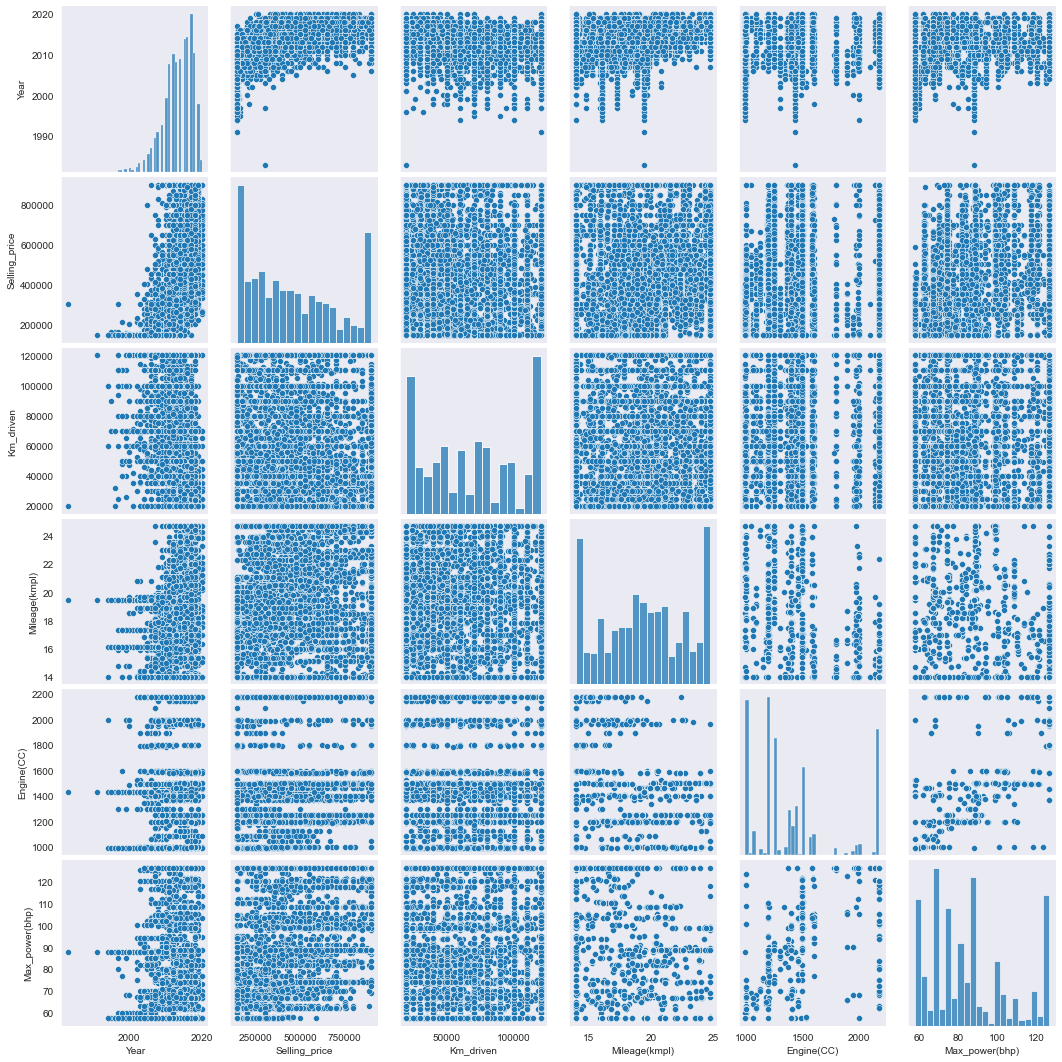

In [67]:
sns.pairplot(car_ds)

# ENCONDING THE DATASET USING LABEL ENCODER:

In [68]:
le=LabelEncoder()
for i in car_ds.columns:
    car_ds[i] = le.fit_transform(car_ds[i])
car_ds

,Name,Year,Selling_price,Km_driven,Fuel,Seller_type,Transmission,Owner,Mileage(kmpl),Engine(CC),Max_power(bhp),Seats
0,1307,22,198,591,1,1,1,0,252,17,48,1
1,1607,22,145,591,1,1,1,2,202,41,138,1
2,385,14,10,591,3,1,1,4,101,40,57,1
3,781,18,52,591,1,1,1,0,244,28,100,1
4,1349,15,0,591,3,1,1,0,59,18,92,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,1409,21,77,230,3,1,1,2,130,2,28,1
8122,773,22,213,448,1,1,1,2,235,28,95,1
8123,771,21,115,567,3,1,1,0,122,14,71,1
8124,656,15,0,590,1,1,1,1,76,37,153,1


# MULTIVARIATE HEAT MAP

**To analyze the correlation between each and every attribute in the dataset heatmap is used. Darker the shade, more is the correlation. Here dark blue shade represents higher correlation for that particular variables. Pale yellow represents lower correlation.**

<AxesSubplot:>

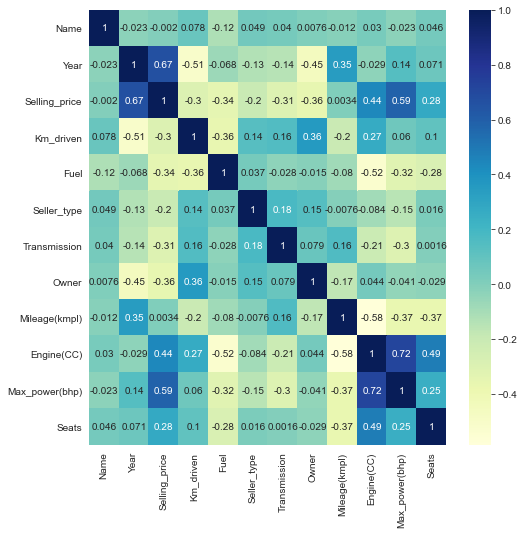

In [69]:
fig,ax=plt.subplots(figsize = (8,8))
x=car_ds.corr()
sns.heatmap(x,annot=True,cmap='YlGnBu')

# INFERENCE:

**The above heatmap shows that Max_power(bhp) and Engine(CC) have more correlation while Selling_price and Mileage have the least correlation**

# HYPERPARAMETER TUNING:

**RANDOM FOREST REGRESSOR**:

In [70]:
x=car_ds.drop('Selling_price',axis=1)
y=car_ds['Selling_price']

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.10)

In [72]:
rfr_model=RandomForestRegressor(n_estimators=200)
rfr_model.fit(x_train,y_train)
print("Random Forest: ",rfr_model.score(x_test,y_test))

Random Forest:  0.9248153949737193


In [73]:
l=[i for i in range(1,101)]
kfold = KFold(n_splits=10, random_state=None)
parameter= {"max_depth": [2,7,9,11,13,15,None],
              "max_features":['auto', 'sqrt', 'log2',None],
              "max_leaf_nodes":l,
              'min_samples_leaf':l}
rfr_model1= RandomForestRegressor()
rfr_model1_tuning= RandomizedSearchCV(rfr_model1, parameter, cv = 5)
  
rfr_model1_tuning.fit(x_train, y_train)
print("Tuned Random forest classifier Parameters: {}".format(rfr_model1_tuning.best_params_))
print("Best score is {}".format(rfr_model1_tuning.best_score_))

Tuned Random forest classifier Parameters: {'min_samples_leaf': 12, 'max_leaf_nodes': 66, 'max_features': None, 'max_depth': 7}
Best score is 0.8795115811662602


**DECISION TREE REGRESSOR**

In [74]:
l=[i for i in range(1,101)]
kfold1 = KFold(n_splits=10, random_state=None)
parameter1= {"max_depth":l,
             "criterion":["squared_error","friedman_mse","absolute_error","poisson"],
             "splitter":['best','random'],
             "max_leaf_nodes":l,
             "min_samples_leaf":l}
dec_tree=DecisionTreeRegressor()
dec_tree_tuning= RandomizedSearchCV(dec_tree, parameter1, cv = 5) 
dec_tree_tuning.fit(x_train, y_train)
print("Tuned Random forest classifier Parameters: {}".format(dec_tree_tuning.best_params_))
print("Best score is {}".format(dec_tree_tuning.best_score_))

Tuned Random forest classifier Parameters: {'splitter': 'best', 'min_samples_leaf': 24, 'max_leaf_nodes': 66, 'max_depth': 97, 'criterion': 'friedman_mse'}
Best score is 0.8534318516950536


/Users/smrithi/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/smrithi/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/smrithi/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1242, in fit
    super().fit(
  File "/Users/smrithi/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 336, in fit
    criterion = CRITERIA_REG[self.criterion](self.n_outputs_,
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/smrithi/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on th

# MACHINE LEARNING ALGORITHM IMPLEMENTATION TO PREDICT SELLING PRICE

In [75]:
accuracy=[]
model=[]
with_pca=[]
mse=[]

In [76]:
x=car_ds.drop('Selling_price',axis=1)
y=car_ds['Selling_price']

In [77]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x,y,test_size=0.10)

**DECISION TREE:**

In [78]:
decision_tree=DecisionTreeRegressor(min_samples_leaf=.01)
decision_tree.fit(x_train1,y_train1)
y_preds=decision_tree.predict(x_test1)
accuracy.append(r2_score(y_test1,y_preds)*100)
model.append('Decision Tree')
with_pca.append(0)
mse.append(mean_squared_error(y_test1,y_preds))
print("Accuracy of Decision Tree Regressor without PCA: ",r2_score(y_test1,y_preds)*100)
print("The mean squared error of Decision tree regressor without pca is: ",mean_squared_error(y_test1,y_preds))
print(" ")

Accuracy of Decision Tree Regressor without PCA:  83.28794787727738
The mean squared error of Decision tree regressor without pca is:  3092.151744259001
 


In [79]:
df=pd.DataFrame({'y':y_test1,'y_predicted':y_preds})
df

,y,y_predicted
886,115,85.013889
7127,0,26.430000
3193,404,308.523810
4778,289,278.126050
1679,285,303.104167
...,...,...
5001,43,10.681416
8077,254,142.803571
7635,241,187.118812
150,372,397.245283


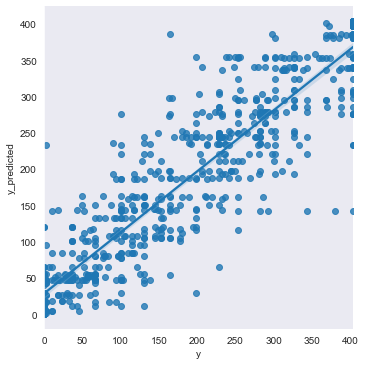

In [80]:
sns.lmplot(x='y',y='y_predicted',data=df)

**LINEAR REGRESSION:**

In [81]:
mlrm =LinearRegression()
mlrm.fit(x_train1, y_train1)
y_preds1= mlrm.predict(x_test1)
print("the accuracy of linear regression model without PCA is: ",r2_score(y_test1,y_preds1)*100)
print("The mean squared error of Linear regression without pca is: ", mean_squared_error(y_test1,y_preds1))
model.append('Linear regression')
with_pca.append(0)
mse.append(mean_squared_error(y_test1,y_preds1))
accuracy.append(r2_score(y_test1,y_preds1)*100)

the accuracy of linear regression model without PCA is:  75.61373520617
The mean squared error of Linear regression without pca is:  4512.074918416335


In [82]:
df1=pd.DataFrame({'y':y_test1,'y_predicted':y_preds1})
df1

,y,y_predicted
886,115,90.541229
7127,0,111.533961
3193,404,326.817231
4778,289,346.831423
1679,285,239.177065
...,...,...
5001,43,19.546829
8077,254,200.745664
7635,241,192.870246
150,372,316.898432


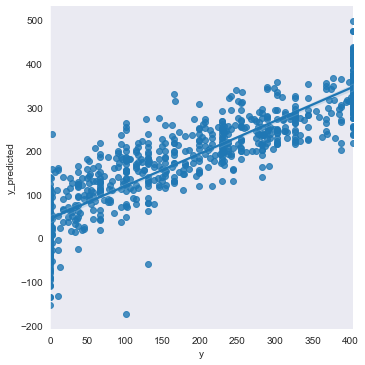

In [83]:
sns.lmplot(x='y',y='y_predicted',data=df1)

**KNN REGRESSOR:**

In [84]:
neigh= KNeighborsRegressor(n_neighbors=3)
neigh.fit(x_train1, y_train1)
y_preds2= neigh.predict(x_test1)
print("the accuracy of this model is: ",r2_score(y_test1,y_preds2)*100)
print("The mean squared error of KNN regressor without pca is: ", mean_squared_error(y_test1,y_preds2))
model.append('KNN regressor')
with_pca.append(0)
mse.append(mean_squared_error(y_test1,y_preds2))
accuracy.append(r2_score(y_test1,y_preds2)*100)

the accuracy of this model is:  80.06440852206013
The mean squared error of KNN regressor without pca is:  3688.5879429212764


In [85]:
df2=pd.DataFrame({'y':y_test1,'y_predicted':y_preds2})
df2

,y,y_predicted
886,115,95.333333
7127,0,197.333333
3193,404,333.333333
4778,289,309.666667
1679,285,331.000000
...,...,...
5001,43,44.666667
8077,254,128.000000
7635,241,213.333333
150,372,354.000000


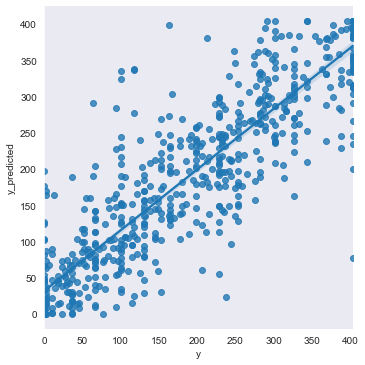

In [86]:
sns.lmplot(x='y',y='y_predicted',data=df2)

# PCA + BAGGING:

In [105]:
pca = PCA(n_components =9)
x = pca.fit_transform(x)

**DECISION TREE with PCA and bagging:**

In [106]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x,y,test_size=0.10)

In [107]:
decision_tree1=DecisionTreeRegressor()
num=90
model1= BaggingRegressor(base_estimator=decision_tree1, n_estimators=num)
model1.fit(x_train2,y_train2)
y_preds3=model1.predict(x_test2)
print('Accuracy of Decision Tree Classifier is ',r2_score(y_test2,y_preds3)*100)
print("the mean squared error of the decision tree classifier with PCA and bagging is: ",mean_squared_error(y_test2,y_preds3))
mse.append(mean_squared_error(y_test2,y_preds3))
model.append('Decision Tree')
with_pca.append(1)
accuracy.append(r2_score(y_test2,y_preds3)*100)

Accuracy of Decision Tree Classifier is  89.65155036055424
the mean squared error of the decision tree classifier with PCA and bagging is:  1916.481500850157


In [108]:
df3=pd.DataFrame({'y':y_test2,'y_predicted':y_preds3})
df3

,y,y_predicted
2926,306,301.127407
3782,229,257.714815
1417,163,194.017577
7076,253,291.820370
1705,30,40.538624
...,...,...
4731,49,64.677778
4254,43,81.048519
1065,404,399.770370
375,404,326.544444


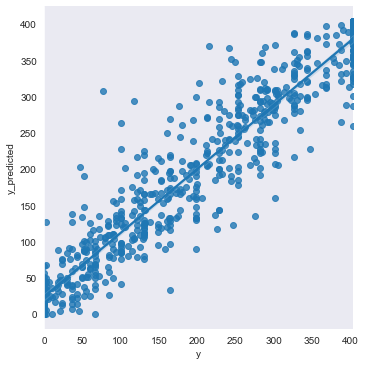

In [109]:
sns.lmplot(x='y',y='y_predicted',data=df3)

**LINEAR REGRESSION WITH PCA AND BAGGING:**

In [110]:
mlrm1=LinearRegression()
num1=90
model2= BaggingRegressor(base_estimator=mlrm1, n_estimators=num1)
model2.fit(x_train2, y_train2)
y_preds4= model2.predict(x_test2)
print('Accuracy of linear regression method is ',r2_score(y_test2,y_preds4)*100)
print("the mean squared error of the decision tree classifier with PCA and bagging is: ",mean_squared_error(y_test2,y_preds4))
mse.append(mean_squared_error(y_test2,y_preds4))
model.append('Linear regression')
with_pca.append(1)
accuracy.append(r2_score(y_test2,y_preds4)*100)

Accuracy of linear regression method is  73.7818637663651
the mean squared error of the decision tree classifier with PCA and bagging is:  4855.468676873376


In [111]:
df4=pd.DataFrame({'y':y_test2,'y_predicted':y_preds4})
df4

,y,y_predicted
2926,306,270.504113
3782,229,221.251760
1417,163,260.696816
7076,253,246.948942
1705,30,64.957211
...,...,...
4731,49,127.745012
4254,43,114.383029
1065,404,409.599357
375,404,324.533967


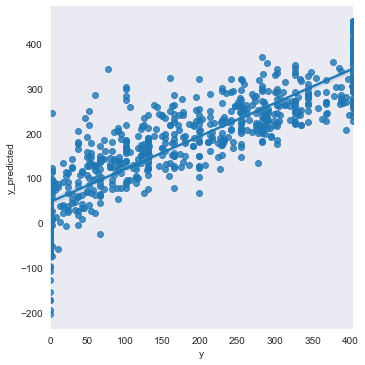

In [112]:
sns.lmplot(x='y',y='y_predicted',data=df4)

**KNN REGRESSOR WITH PCA AND BAGGING:**

In [113]:
neigh1= KNeighborsRegressor(n_neighbors=3)
num2=90
model3= BaggingRegressor(base_estimator=neigh1, n_estimators=num2)
model3.fit(x_train2, y_train2)
y_preds5= model3.predict(x_test2)
print("the accuracy of this model is: ",r2_score(y_test2,y_preds5)*100)
print("The mean squared error of KNN regressor without pca is: ", mean_squared_error(y_test2,y_preds5))
model.append('KNN regressor')
with_pca.append(1)
mse.append(mean_squared_error(y_test2,y_preds5))
accuracy.append(r2_score(y_test2,y_preds5)*100)

the accuracy of this model is:  78.32070865062929
The mean squared error of KNN regressor without pca is:  4014.8971363052433


In [114]:
df5=pd.DataFrame({'y':y_test2,'y_predicted':y_preds5})
df5

,y,y_predicted
2926,306,319.881481
3782,229,183.851852
1417,163,188.114815
7076,253,284.000000
1705,30,45.777778
...,...,...
4731,49,237.392593
4254,43,93.459259
1065,404,402.988889
375,404,169.066667


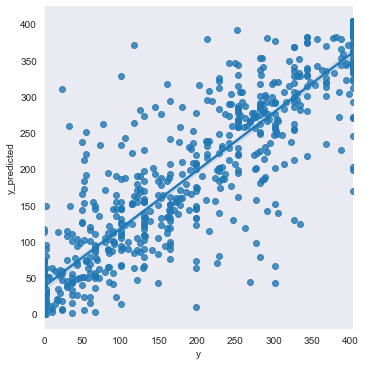

In [115]:
sns.lmplot(x='y',y='y_predicted',data=df5)

In [98]:
df6=pd.DataFrame()
df6['model']=model
df6['with_pca']=with_pca
df6['accuracy']=accuracy
df6['mean_squared_error']=mse
df6

,model,with_pca,accuracy,mean_squared_error
0,Decision Tree,0,83.287948,3092.151744
1,Linear regression,0,75.613735,4512.074918
2,KNN regressor,0,80.064409,3688.587943
3,Decision Tree,1,88.836272,2050.190868
4,Linear regression,1,73.793168,4812.819713
5,KNN regressor,1,78.436660,3960.053960


<AxesSubplot:xlabel='model', ylabel='accuracy'>

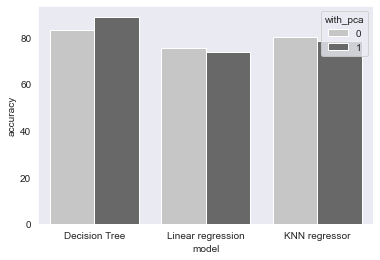

In [99]:
sns.barplot(x=df6['model'],y=df6['accuracy'],hue=df6['with_pca'],palette='Greys')

# BOOSTING:

**ADA BOOSTING**

In [100]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(x,y,test_size=0.10)

In [101]:
a = AdaBoostRegressor()
a.fit(x_train3,y_train3)
y_preds6=a.predict(x_test3)
print("the accuracy of ada boosting regressor is: ",r2_score(y_test3,y_preds6)*100)
print("The mean squared error of ada boosting regressor without pca is: ", mean_squared_error(y_test3,y_preds6))

the accuracy of ada boosting regressor is:  66.2962853688574
The mean squared error of ada boosting regressor without pca is:  6060.107658702228


**ADABOOSTING WITH PCA**

In [102]:
a1= AdaBoostRegressor()
a1.fit(x_train2,y_train2)
y_preds7=a1.predict(x_test2)
print("the accuracy of ada boosting regressor is: ",r2_score(y_test2,y_preds7)*100)
print("The mean squared error of ada boosting regressor with pca is: ", mean_squared_error(y_test2,y_preds7))

the accuracy of ada boosting regressor is:  68.19605903622086
The mean squared error of ada boosting regressor with pca is:  5840.714844988137


**GRADIENT BOOSTING REGRESSOR**

In [103]:
g= GradientBoostingRegressor()
g.fit(x_train3,y_train3)
y_preds8=g.predict(x_test3)
print("the accuracy of this model is: ",r2_score(y_test3,y_preds8)*100)
print("The mean squared error of gradient boosting regressor without pca is: ", mean_squared_error(y_test3,y_preds8))

the accuracy of this model is:  87.21148541192755
The mean squared error of gradient boosting regressor without pca is:  2299.443133991893


**GRADIENT BOOSTING REGRESSOR WITH PCA**

In [104]:
g1= GradientBoostingRegressor()
g1.fit(x_train2,y_train2)
y_preds9=g1.predict(x_test2)
print("the accuracy of this model is: ",r2_score(y_test2,y_preds9)*100)
print("The mean squared error of Gradient boosting regressor with pca is: ", mean_squared_error(y_test2,y_preds9))

the accuracy of this model is:  87.1984444806011
The mean squared error of Gradient boosting regressor with pca is:  2350.9739074867257
